# TAREA R PARTE 3

Laura González 162848

Hacer todos los ejercicios hechos durante la clase.

Ejercicios durante la sesión 1
Visualizaciones interactivas para el cruce de variables filtrado por sexo.

### Ejercicio 1: Velocidad de la luz
Tenemos 5 experimentos con 20 corridas de mediciones de la velocidad de la luz.

¿Cómo exponen los resultados? ¿Los resultados se ven equivalentes entre los experimentos?

In [11]:
library(MASS) #Primero descargamos la librería que nos da el ejercicio
vl <- data.frame(michelson) #Hacemos los datos en data frame 
vl #Los imprimirmos para ver los datos que tenemos

,Speed,Run,Expt
,<int>,<fct>,<fct>
1,850,1,1
2,740,2,1
3,900,3,1
4,1070,4,1
5,930,5,1
6,850,6,1
7,950,7,1
8,980,8,1
9,980,9,1


In [12]:
library(ggplot2)
install.packages('ggthemes')
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




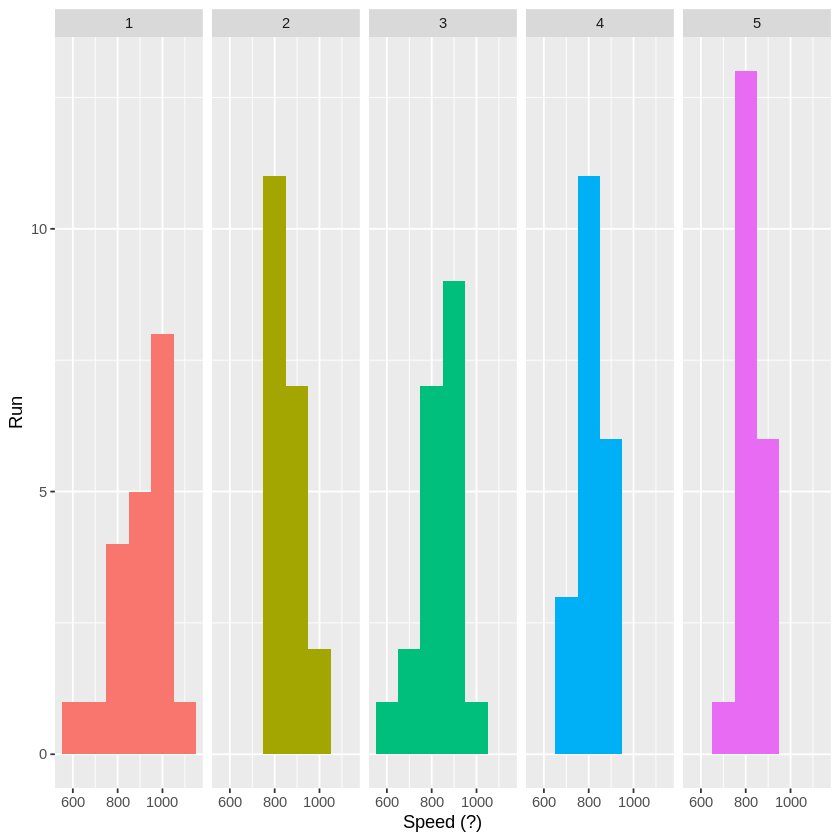

In [13]:
ggplot(vl, aes(Speed, fill=Expt)) + 
    geom_histogram(binwidth = 100) + xlab("Speed (?)") + 
    ylab("Run") + facet_grid(~Expt) +
    theme(legend.position = 'none')

Las variables que nos importan son speed (velocidad de la luz) y run (las corridas). Expusimos los resultados con las gráficas de barras. Podemos observar que el grupo 5 tiene varias corridas con 800 de speed, así como en la 2 y en la 4. En el grupo 1 y 3 el speed está más hacia el 1000

### Ejercicio 2: Pima Indians
¿Qué dice este gráfico de barras?

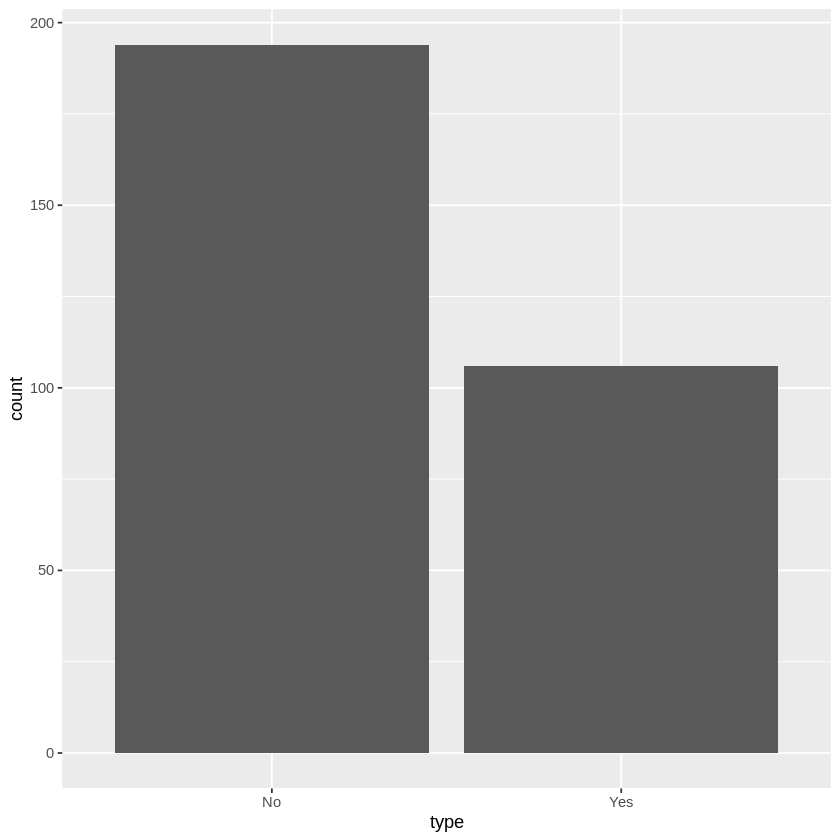

In [4]:
ggplot(Pima.tr2, aes(type))+geom_bar()

Con la función help(Pima.tr2) podemos observar que es una base de datos de Pima Indian Heritage de mujeres de 21 años en adelante con datos de diabetes, por lo que el gráfico nos indica la cantidad de mujeres que no tiene diabetes (NO) y las que sí (YES)

### ¿Por qué la parte superior izquierda está vacía?

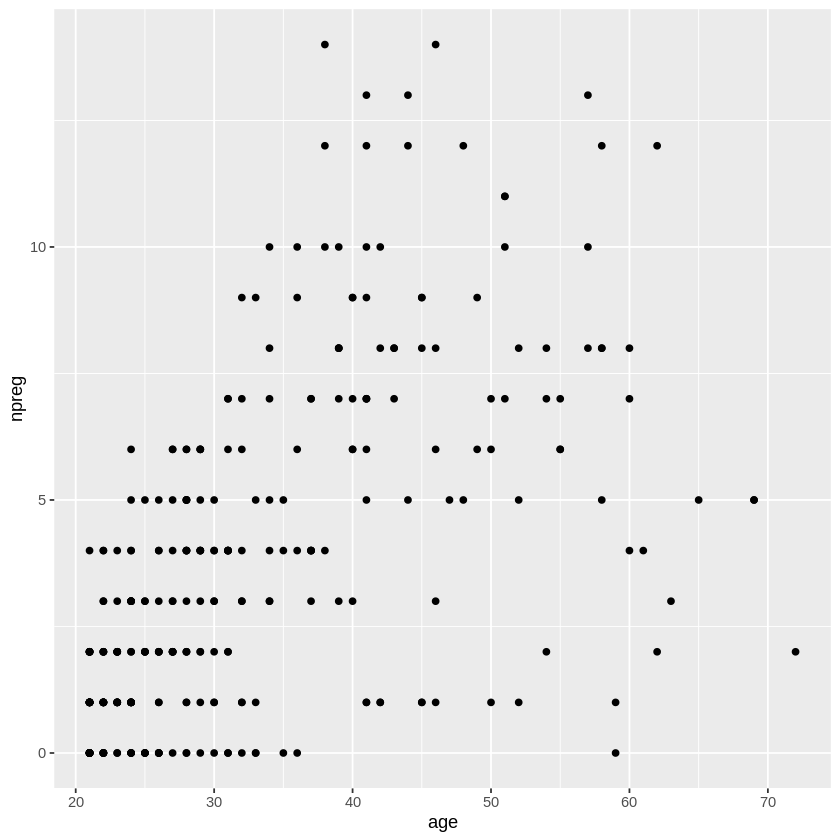

In [5]:
ggplot(Pima.tr2, aes(age,npreg))+geom_point()

Para esta gráfica se tomaron los datos de edad y número de embarazos. La parte superior izquierda está vacía porque los embarazos tienen una duración de 9 meses, por lo cual no pueden tener más embarazos justo porque tienen que esperar mínimo 9 meses para empezar con el siguiente 

### Ejercicio 3: Titanic
¿Qué se les ocurre para graficar todo?

¿Cuántos pasajeros en total viajaban por clase?

Exploren una por una las otras variables categóricas del dataset

In [1]:
head(data.frame(Titanic))

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


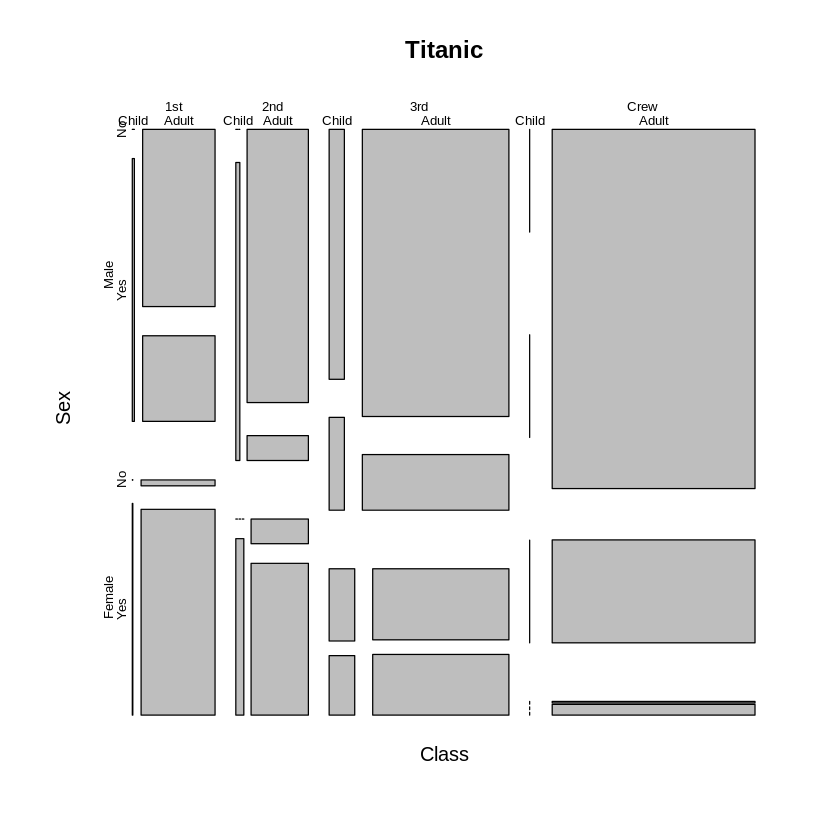

In [2]:
plot(Titanic)

Se me ocurrió utilizar la función plot para que pudiéramos ver todo el comportamiento. Por ejemplo ve,os que hay más hombres adultos de la 3a clase e igual con muejeres y niños 

In [7]:
install.packages('gridExtra')
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



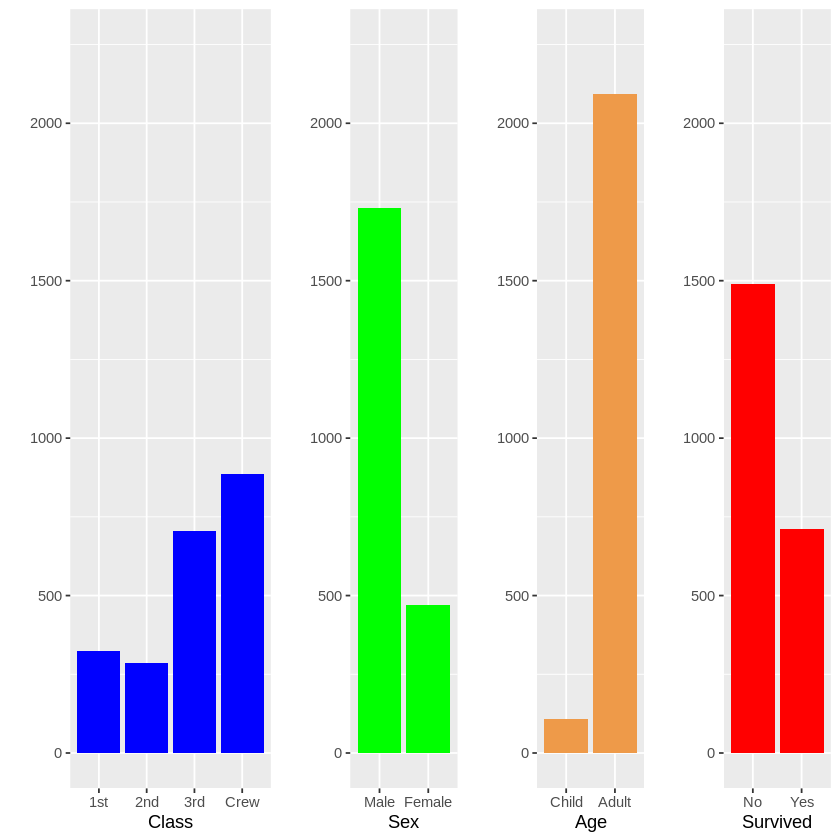

In [6]:
library(ggplot2)
Titanic1 <- data.frame(Titanic)
p <- ggplot(Titanic1, aes(weight=Freq)) +
            ylab("") + ylim(0,2250)
cs <- p + aes(Class) + geom_bar(fill="blue")
sx <- p + aes(Sex) + geom_bar(fill="green")
ag <- p + aes(Age) + geom_bar(fill="tan2")
su <- p + aes(Survived) + geom_bar(fill="red")
grid.arrange(cs, sx, ag, su, nrow=1, widths=c(3, 2, 2, 2))

### Viajeros por clase

In [11]:
data.frame(Titanic)%>% #Hacemos ahora un data frame de las personas que viajaban por clase
group_by(Class) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Class,count
<fct>,<dbl>
1st,325
2nd,285
3rd,706
Crew,885


### Exploración de variables categóricas

In [12]:
data.frame(Titanic)%>% #Hacemos ahora un data frame de las personas que viajaban por sexo (Mujeres y Hombres)
group_by(Sex) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Sex,count
<fct>,<dbl>
Male,1731
Female,470


In [13]:
data.frame(Titanic)%>% #Hacemos ahora un data frame de las personas que viajaban por edad (Adultos y Niños)
group_by(Age) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Age,count
<fct>,<dbl>
Child,109
Adult,2092


In [14]:
data.frame(Titanic)%>% #Hacemos ahora un data frame de las personas que sobrevivieron
group_by(Survived) %>%
summarise(count = sum(Freq))

`summarise()` ungrouping output (override with `.groups` argument)



Survived,count
<fct>,<dbl>
No,1490
Yes,711


Podemos observar que había más hombres que mujeres, más adultos que niños, más de 3ra clase que de las otras 2 y hubo casi la mitad de sobrevivientes

### Ejercicio 4: Swiss
Tenemos datos de fertilidad y otras variables socioeconómicas de 47 provincias franco-parlantes en Swiza en 1888.
¿Cómo conjuntarían todas las variables?
Hagan gráficas para cada variable. ¿Se ve algo especial o raro?
Hagan un scatterplot de Fertilidad vs el porcentaje de católicos. ¿Se ve algo interesante?
¿Hay relación entre agricultura y Educación?

In [21]:
head(data.frame(swiss))

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


Podemos conjuntar todas las variables con un boxplot para observar su comportamiento

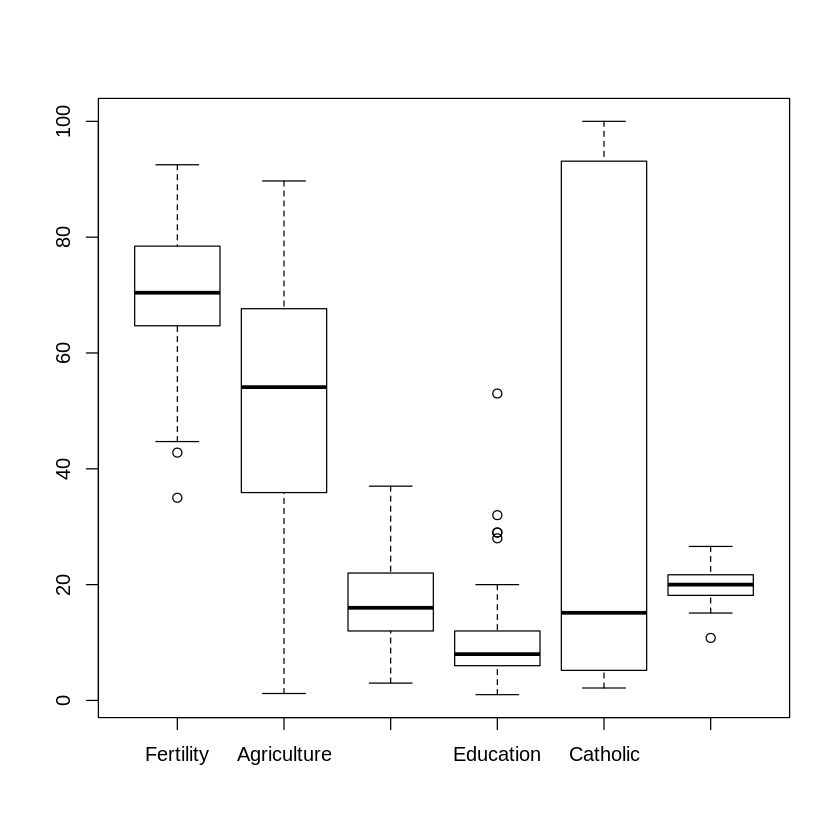

In [42]:
boxplot(data.frame(swiss))

In [49]:
library(gridExtra)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



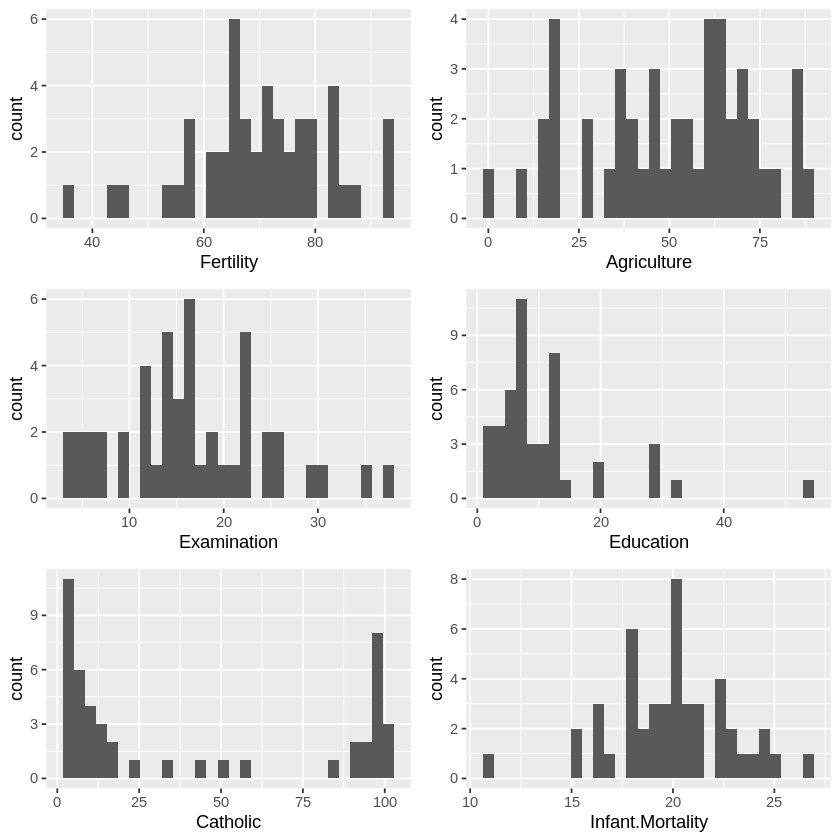

In [51]:
Suiza <- data.frame(swiss)
h1 <- ggplot(data=Suiza, aes(Fertility)) + geom_histogram()
h2 <- ggplot(data=Suiza, aes(Agriculture)) + geom_histogram()
h3 <- ggplot(data=Suiza, aes(Examination)) + geom_histogram()
h4 <- ggplot(data=Suiza, aes(Education)) + geom_histogram()
h5 <- ggplot(data=Suiza, aes(Catholic)) + geom_histogram()
h6 <- ggplot(data=Suiza, aes(Infant.Mortality)) + geom_histogram()
grid.arrange(h1, h2, h3, h4, h5, h6, nrow=3)

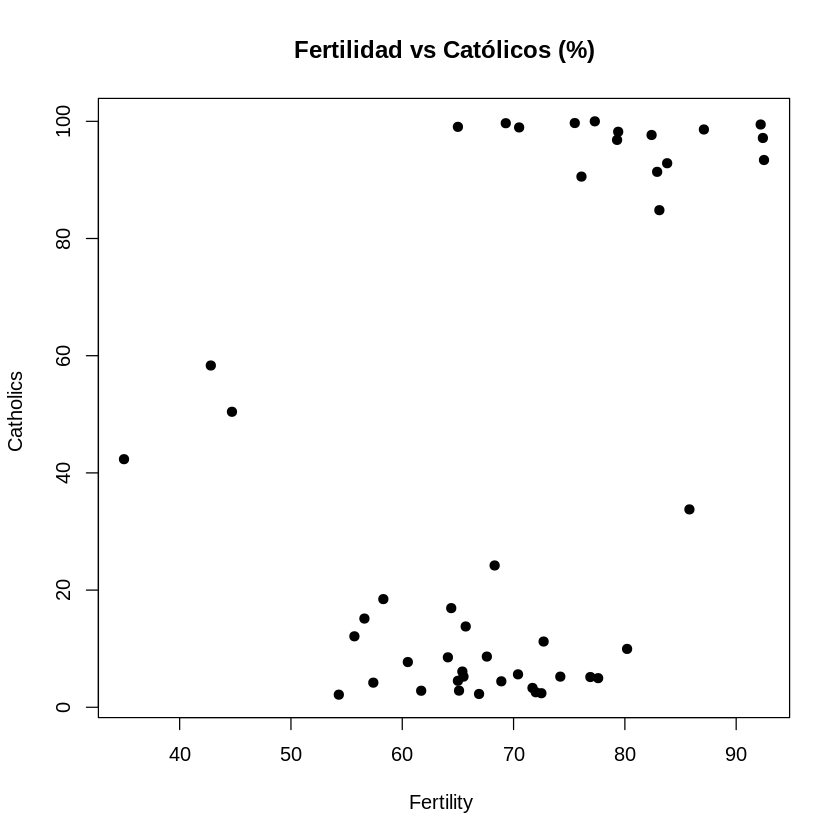

In [39]:
plot(swiss$Fertility, swiss$Catholic, main="Fertilidad vs Católicos (%)",
   xlab="Fertility ", ylab="Catholics ", pch=19)

La fertilidad es muy alta en Suiza pero el %de Católicos varía en cada región, hay lugares que no tienen nada de católicos y hay otros que casi toda su población es católica. Por lo cual no podemos decir que existe una relacción de causalidad pero sí están correlacionados

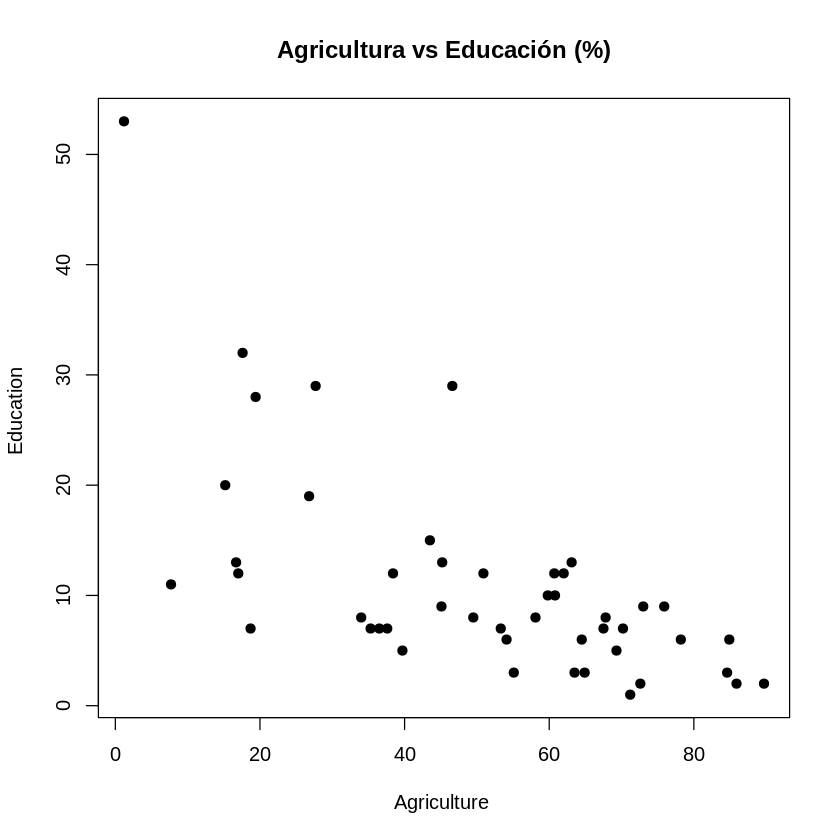

In [40]:
plot(swiss$Agriculture, swiss$Education, main="Agricultura vs Educación (%)",
   xlab="Agriculture ", ylab="Education ", pch=19)

En esta gráfica podemos observar que estas variables están un poco relacionadas. Entra mayor sea el porcentaje educativo menor es el procentaje de agricultura y viceversa. Entre Menor sea el porcentaje educativo, mayor es el porcentaje de agricultura

### Ejercicio 5: Galaxias
Usando el conjunto galaxies de MASS, que contiene velocidades para 82 planetas.

Hagan histogramas, boxplots y la aproximación de la densidad.
Cambien los anchos de las bandas y expliquen cuál es el mejor?
Elijan el número de gráficas que se requieren para este experimento

In [14]:
library(MASS)
vl <- data.frame(michelson)

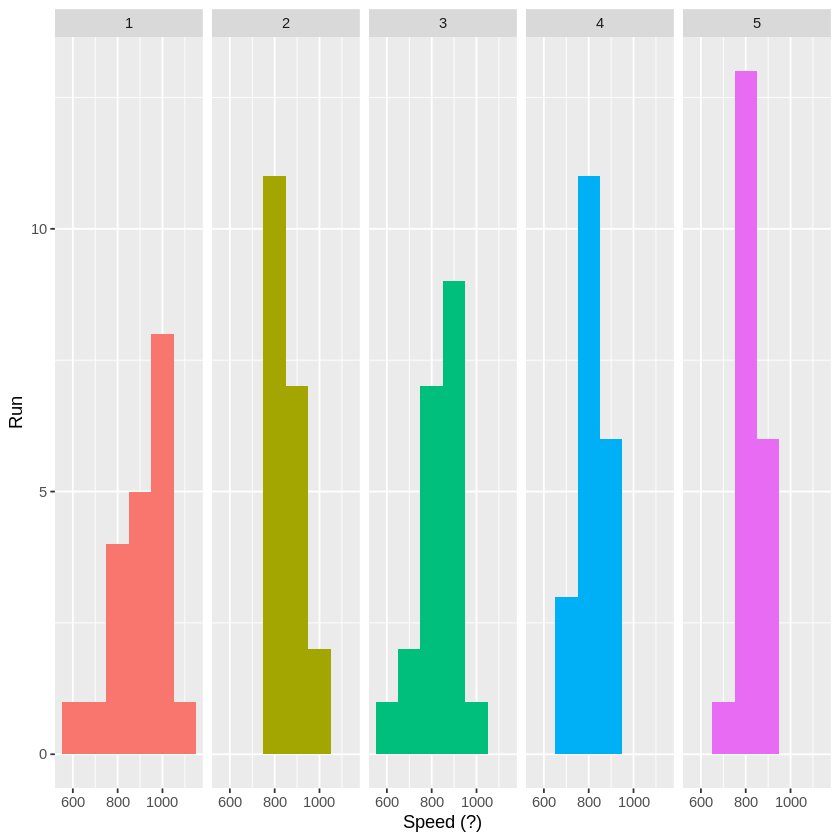

In [15]:
#HACEMOS EL HISTOGRAMA
ggplot(vl, aes(Speed, fill=Expt)) + 
    geom_histogram(binwidth = 100) + xlab("Speed (?)") + 
    ylab("Run") + facet_grid(~Expt) +
    theme(legend.position = 'none')

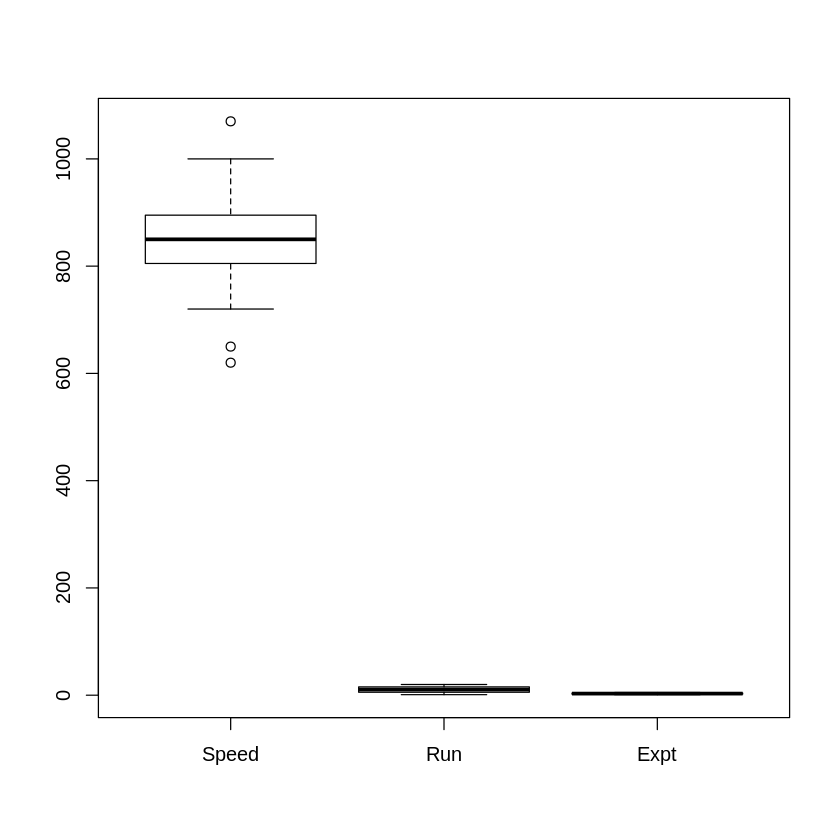

In [16]:
boxplot(data.frame(michelson)) #GRAFICAMOS EL BOXPLOT

### Ejercicio 6:Estudiantes.
El conjunto survey contiene información de estudiantes tomando su primer curso de estadística:

Hacer el histograma y poner encima la estimación de la densidad, ¿hay bimodalidad?
Jueguen con los anchos para tener mejores estimaciones de la densidad, ¿cuál es mejor?
Comparen las distribuciones de hombres y mujeres, que compartan la escala, con distintas estimaciones de densidad

In [18]:
estudiantes <- data.frame(survey)
head(data.frame(estudiantes))

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


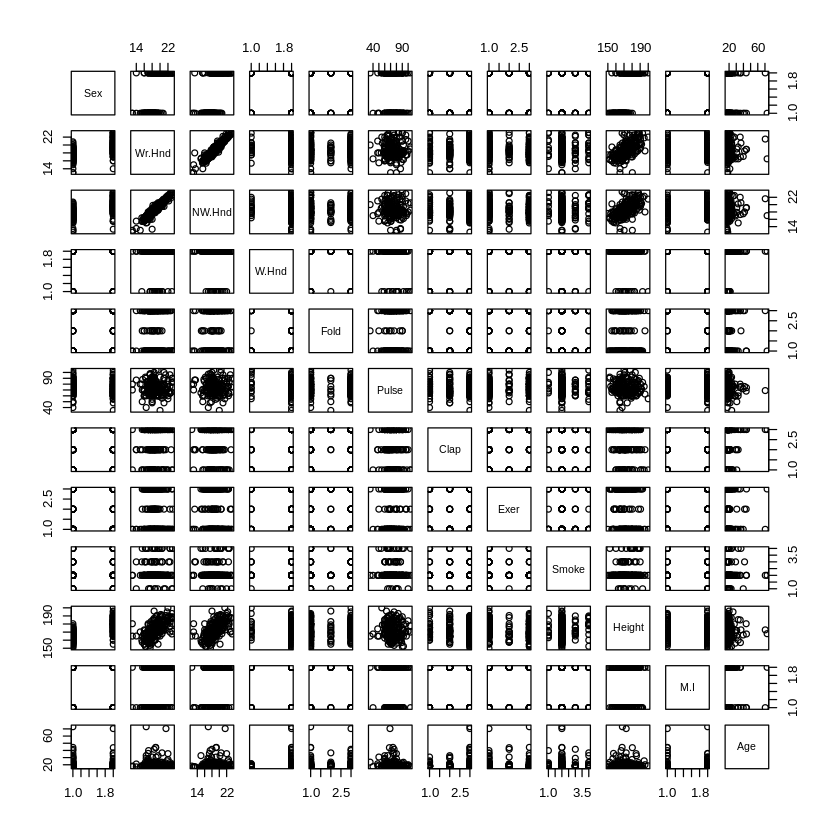

In [67]:
plot(estudiantes)

Con esta primera gráfica parece que no existe relación lineal entre los datos a excepeción de las varibales separación de las maanos., pero seamos realistas, uno no estudia más o mejor o algo en específico por ser zurdo o diestro o por abrir más la mano, por lo que nos enfocaremos con otras variables. Haremos un nuevo data frame con datos más comunes

In [68]:
filtEst <- select(estudiantes, Sex, Exer, Smoke, Age)
head(data.frame(filtEst))

,Sex,Exer,Smoke,Age
,<fct>,<fct>,<fct>,<dbl>
1,Female,Some,Never,18.250
2,Male,None,Regul,17.583
3,Male,None,Occas,16.917
4,Male,None,Never,20.333
5,Male,Some,Never,23.667
6,Female,Some,Never,21.000


Warning message:
“Removed 10 rows containing missing values (geom_bar).”


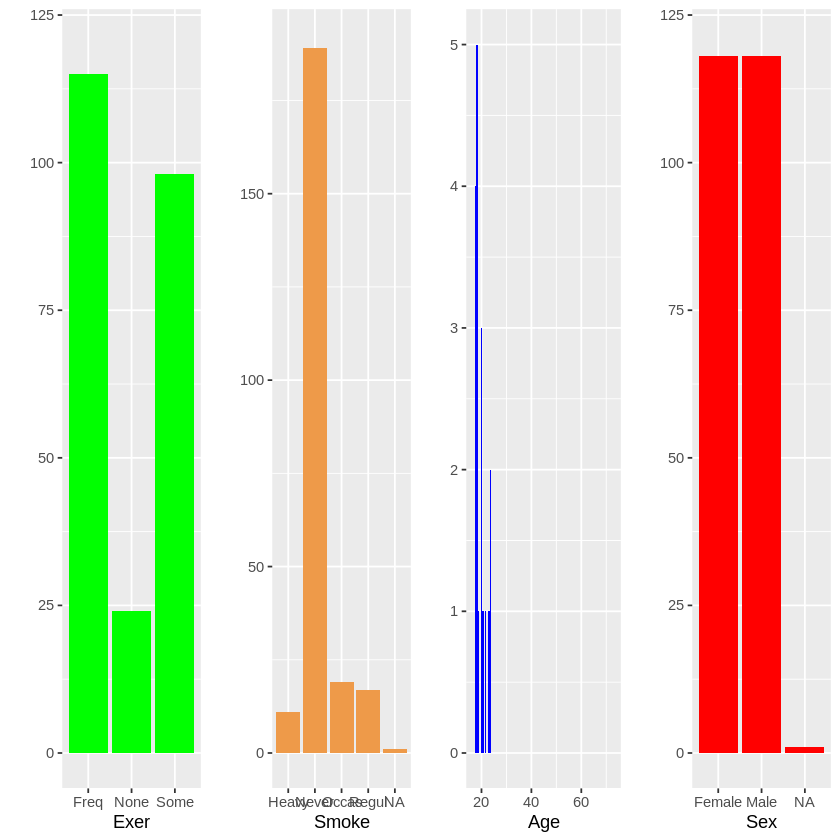

In [90]:
library(gridExtra)
cuenta <- data.frame(filtEst)
k <- ggplot(cuenta, aes()) +
            ylab("")
age <- k + aes(Age) + geom_bar(fill="blue")  + ylim(0,5)
exe <- k + aes(Exer) + geom_bar(fill="green")  + ylim(0,120)
smk <- k + aes(Smoke) + geom_bar(fill="tan2")  + ylim(0,190)
sex <- k + aes(Sex) + geom_bar(fill="red")  + ylim(0,120)
grid.arrange(exe, smk, age, sex, nrow=1)

### Ejercicio 7: Presupuesto
El conjunto zuni del paquete lawstat, contiene 3 variables, distrito, ingreso por estudiante en dólares y el número de estudiantes.

¿Considerarías el 5% más bajo outliers o extremos?
Quitando el 5% inferior hagan el gráfico de estimación de densidad ¿Es simétrico?
Hagan un Q-Q plot y comenten si es normal o no.

In [76]:
install.packages("lawstat")
library(lawstat)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [78]:
zun <- data.frame(zuni)
zun

ERROR: Error in data.frame(zuni): object 'zuni' not found


In [77]:
#Profe, nunca me dejó ver los datos de este dataframe por más que restauré el Kernel

### Ejercicio 8: Máquinas tragamonedas
En el paquete DAAG, está el dataset vlt, muestren si los símbolos que aparecen tienen la misma frecuencia, o no. Ejes comparables.

In [22]:
install.packages('DAAG')
library(DAAG)

also installing the dependencies ‘png’, ‘jpeg’, ‘latticeExtra’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice


Attaching package: ‘DAAG’


The following object is masked from ‘package:MASS’:

    hills




In [23]:
head(data.frame(vlt))

,window1,window2,window3,prize,night
,<int>,<int>,<int>,<int>,<int>
1,2,0,0,0,1
2,0,5,1,0,1
3,0,0,0,0,1
4,2,0,0,0,1
5,0,0,0,0,1
6,0,0,1,0,1


Warning message:
“Removed 1 rows containing missing values (geom_bar).”


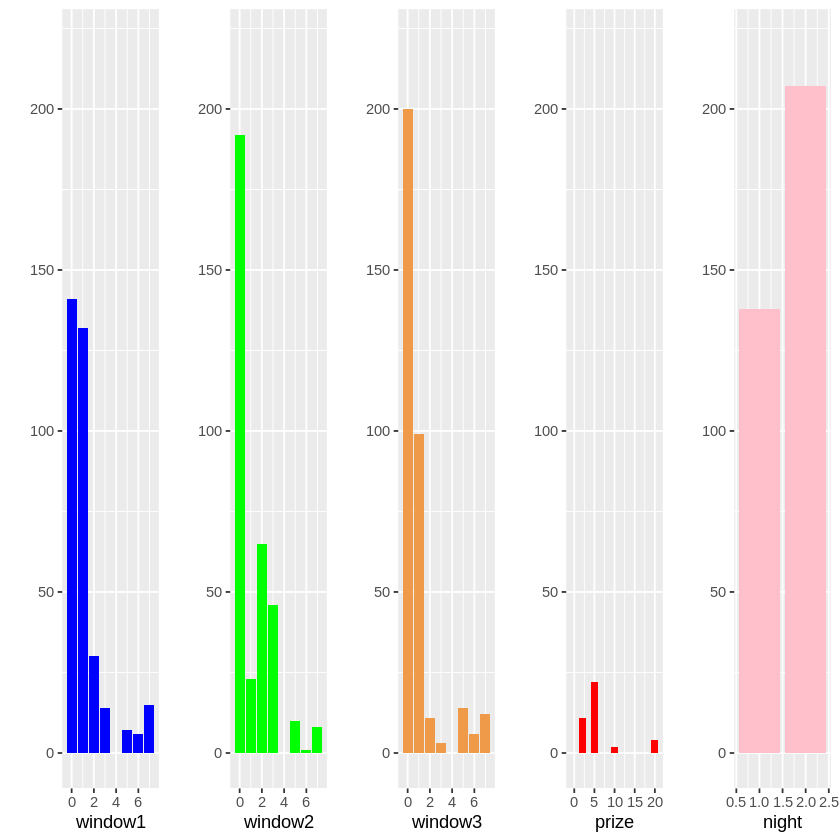

In [28]:
library(gridExtra)
simbolos <- data.frame(vlt)
r <- ggplot(simbolos, aes()) +
            ylab("") + ylim(0,220)
w1 <- r + aes(window1) + geom_bar(fill="blue")
w2 <- r + aes(window2) + geom_bar(fill="green")
w3 <- r + aes(window3) + geom_bar(fill="tan2")
prize <- r + aes(prize) + geom_bar(fill="red")
night <- r + aes(night) + geom_bar(fill="pink")
grid.arrange(w1, w2, w3, prize, night, nrow=1)

Podemos observar que los símbolos no tienen la misma frecuencia

### Ejercicio 9: Daño gastrointestinal
Del conjunto de datos Lanza del paquete HSAUR2, hay cuatr estudios, dibujen un gráfico para comparar los tamaños de los estudios, ¿son iguales? El resultado se mide en la variable classificación, ¿qué opinan?

In [31]:
install.packages('HSAUR2')
library(HSAUR2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: tools



In [37]:
head(data.frame(Lanza))

,study,treatment,classification
,<fct>,<fct>,<ord>
1,I,Misoprostol,1
2,I,Misoprostol,1
3,I,Misoprostol,1
4,I,Misoprostol,1
5,I,Misoprostol,1
6,I,Misoprostol,1


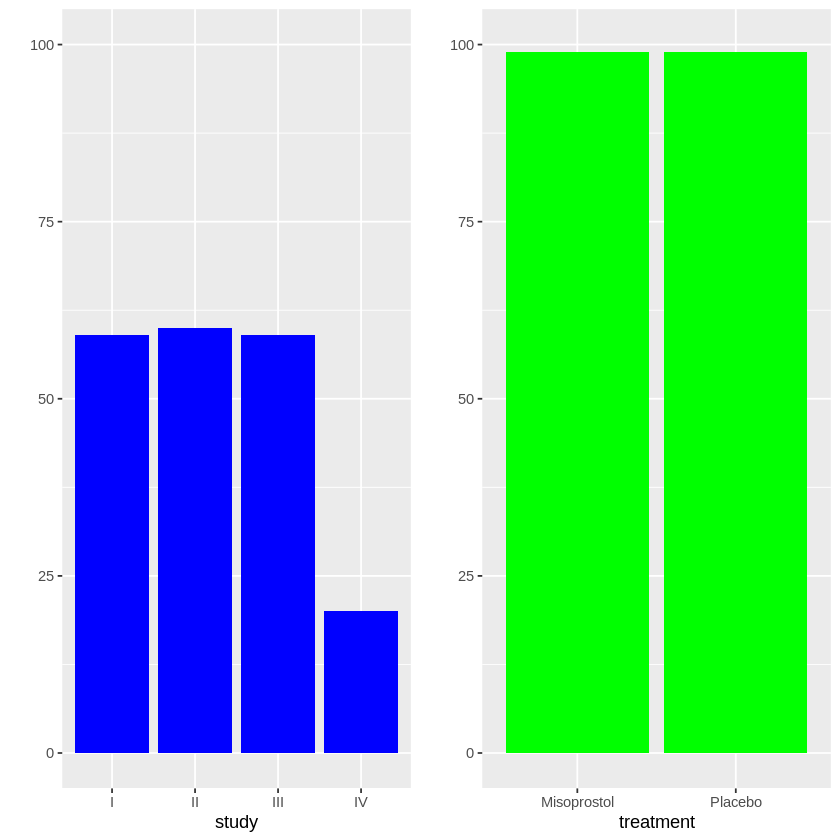

In [43]:
library(gridExtra)
medicina <- data.frame(Lanza)
m <- ggplot(medicina, aes(classification)) +
            ylab("") + ylim(0,100)
st <- m + aes(study) + geom_bar(fill="blue")
tr <- m + aes(treatment) + geom_bar(fill="green")
grid.arrange(st, tr, nrow=1)

Este es un dataframe que tiene 3 variables: el tipo de estudio (I, II, III, IV), el tratamiento (Misorpostol, Placebo) y el nivel de clasificación del 1-5. Podemos observar que están muy parejos los tratamientos, pero el estudio IV ya es muy bajo

### Ejercicio 10: Películas:
¿Cómo se ve el scatterplpot si quitamos los que tienen más de 1000 votos? Ahora filtremos los mayores a 9. ¿Pasa algo?

In [34]:
install.packages('ggplot2movies')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



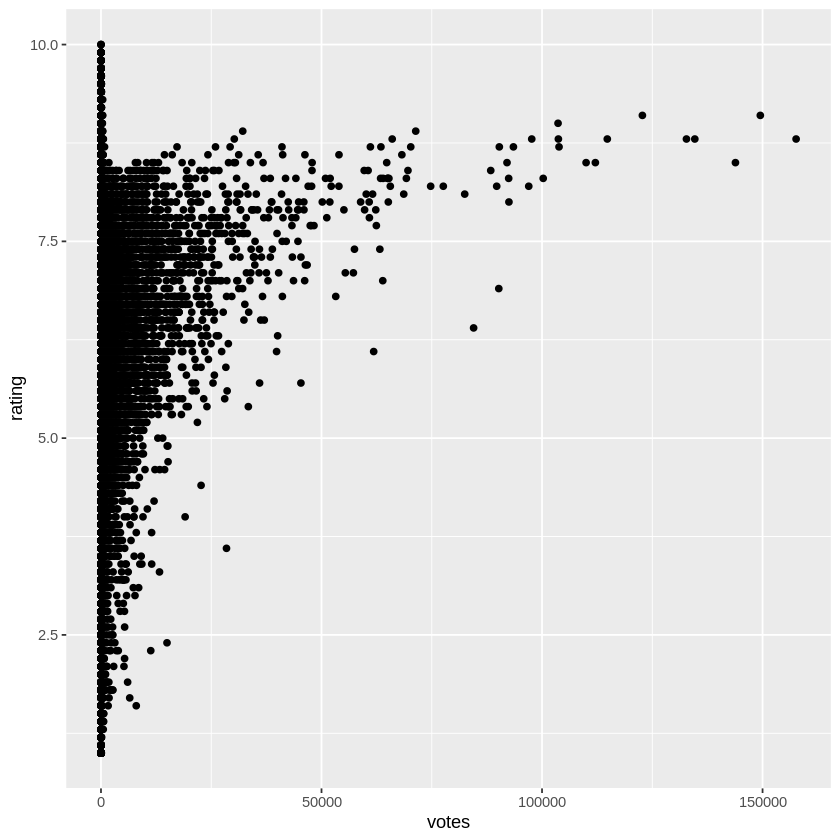

In [35]:
library(ggplot2movies)
ggplot(movies, aes(votes, rating)) + geom_point() + ylim(1,10)

Warning message:
“Removed 4513 rows containing missing values (geom_point).”


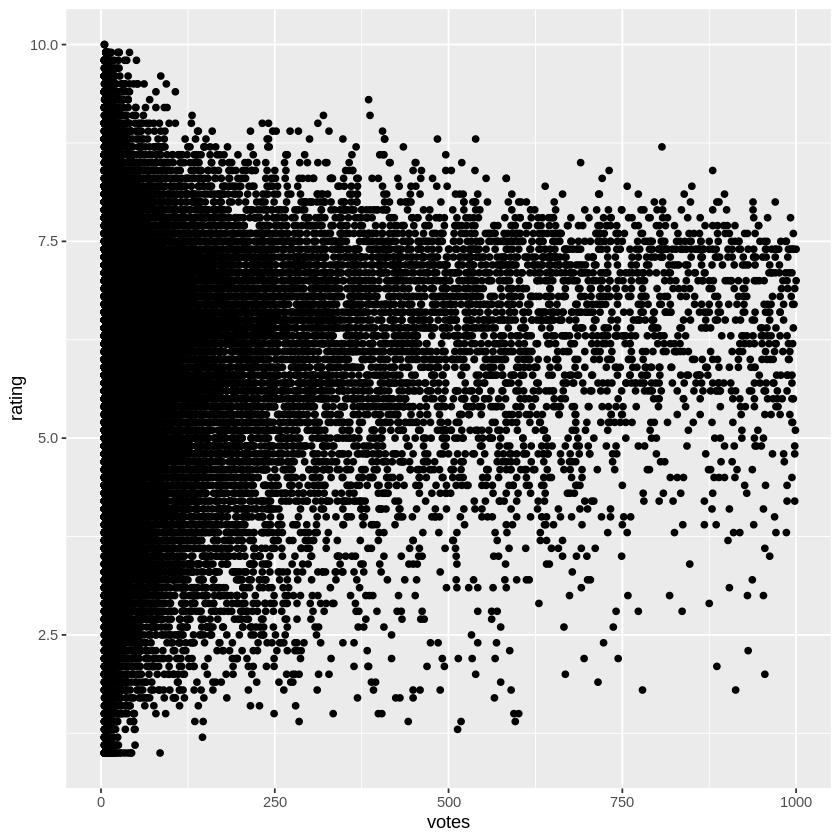

In [44]:
ggplot(movies, aes(votes, rating)) + geom_point() + ylim(1,10) + xlim(0,1000) #Hacemos el filtro con el límite de la x

Warning message:
“Removed 14587 rows containing missing values (geom_point).”


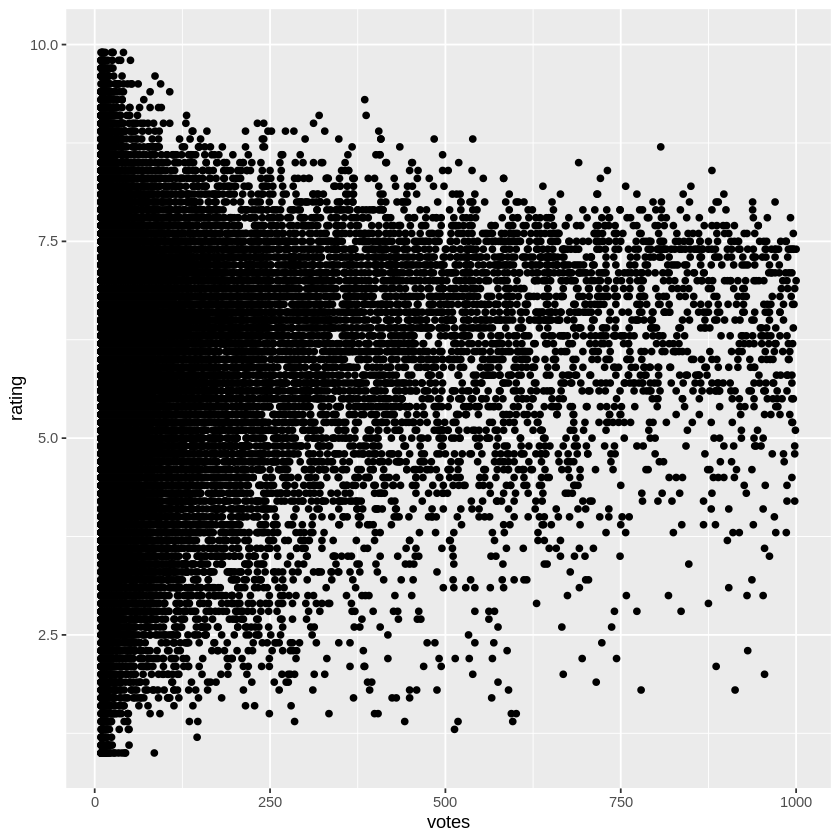

In [45]:
library(ggplot2movies)
ggplot(movies, aes(votes, rating)) + geom_point() + ylim(1,10) + xlim(9,1000)

Podemos ver en el primer filtro que la mayor concentración de datos efectivamente es en un rango con x menor a mil.
Con el segundo filtro se ve que del lado izquierdo se hizo como un corte a comparación del primer filtro. Incluso podemos ver que el mensaje que nos arroja el notebook dice que se eliminaron 14,587 filas


### Ejercicio 11: Autos
Grafiquen 1/MPG.City, vs horsepowerhay ¿una relación lineal? ¿Cuáles son los outliers?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



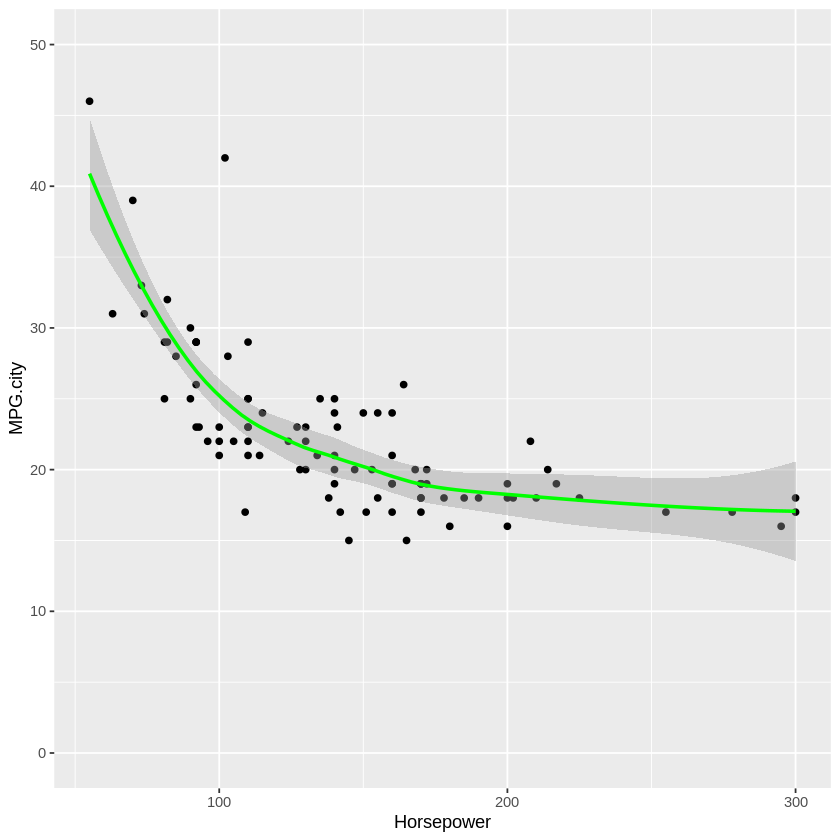

In [52]:
data(Cars93, package="MASS")
ggplot(Cars93, aes(Horsepower, MPG.city)) + geom_point() +
       geom_smooth(colour="green") + ylim(0,50)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



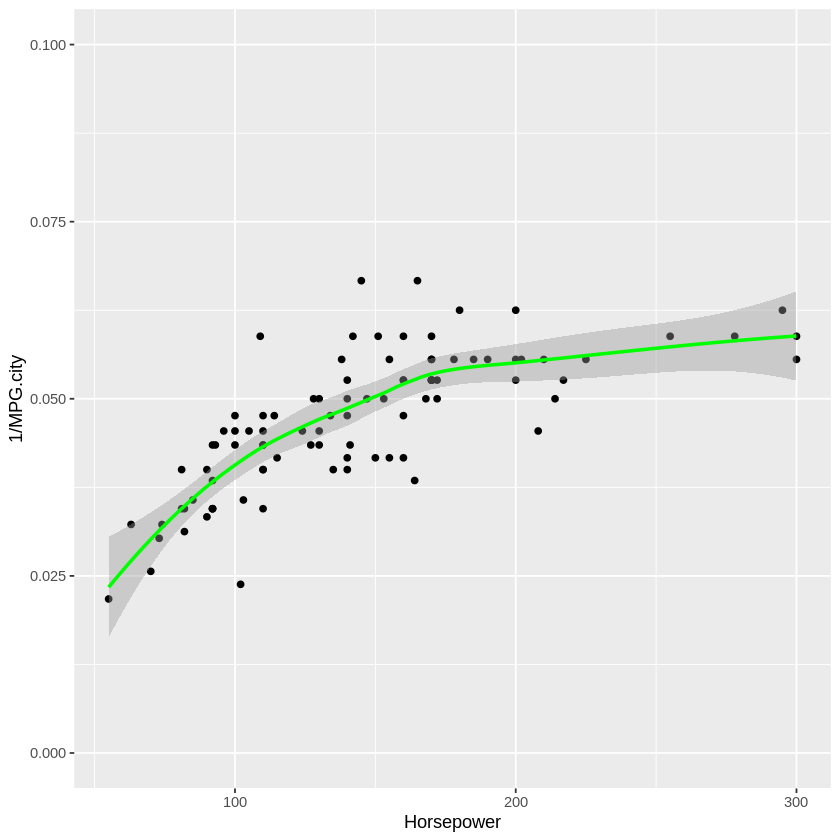

In [57]:
data(Cars93, package="MASS")
ggplot(Cars93, aes(Horsepower, 1/MPG.city)) + geom_point() +
       geom_smooth(colour="green") + ylim(0,0.10)

Podemos desde la gráfica 1 que la relación no es lineal ya que la gráfica es como el logratimo inverso. Una vez que invertimos los datos podemos ver que efectivamente la función se azemeja a un logaritmo, por lo tanto la relación no es lineal. Ahora utilizarmeos la regresión lineal

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



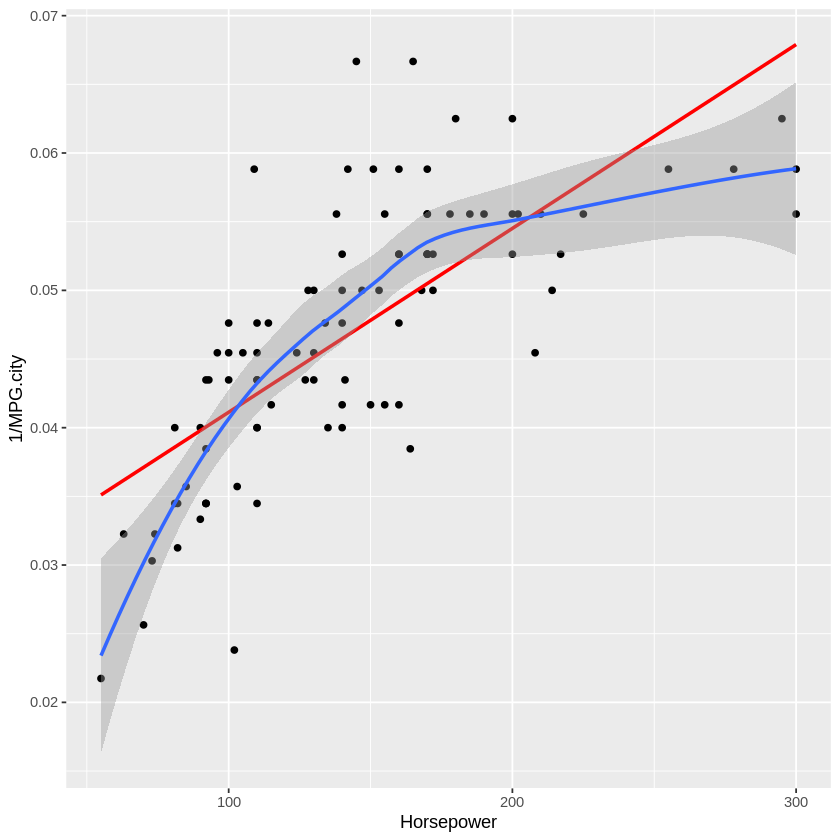

In [59]:
data(Cars93, package="MASS")
ggplot(Cars93, aes(Horsepower, 1/MPG.city)) + geom_point() +
       geom_smooth(method="lm", colour="red", se=FALSE) +
       stat_smooth()

### Ejercicio 12: Bancos
Dentro del paquete Sleuth2, los datos: case1202, tiene tres variables medidas en meses, de: Edad, Seniority, Experience.

¿Qué hay en la matriz de scatterplots? ¿Por?

In [58]:
install.packages('Sleuth2')
library (Sleuth2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [60]:
head(data.frame(case1202))

,Bsal,Sal77,Sex,Senior,Age,Educ,Exper
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,5040,12420,Male,96,329,15,14.0
2,6300,12060,Male,82,357,15,72.0
3,6000,15120,Male,67,315,15,35.5
4,6000,16320,Male,97,354,12,24.0
5,6000,12300,Male,66,351,12,56.0
6,6840,10380,Male,92,374,15,41.5


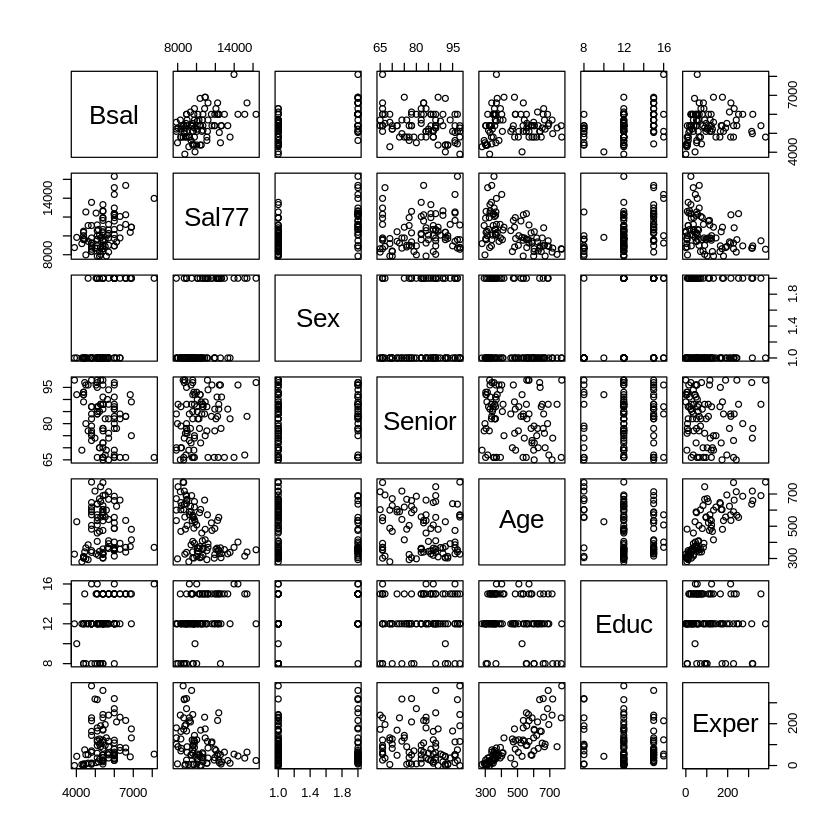

In [61]:
plot(case1202)

Con este plot podemos rápidamente hacer un supuesto sobre las variables del conjunto de datos y la relación entre ellas. Por ejemplo, vemos que Sex en realidad no tienen relación lineal con ninuna de las variables. Tampoco eduaction. Con Age y Experiencie podría hacerse un análisis más profundo para ver si existe una relación lineal

In [63]:
filtro <- select(case1202, Senior, Age, Exper)
head(data.frame(filtro))

,Senior,Age,Exper
,<dbl>,<dbl>,<dbl>
1,96,329,14.0
2,82,357,72.0
3,67,315,35.5
4,97,354,24.0
5,66,351,56.0
6,92,374,41.5


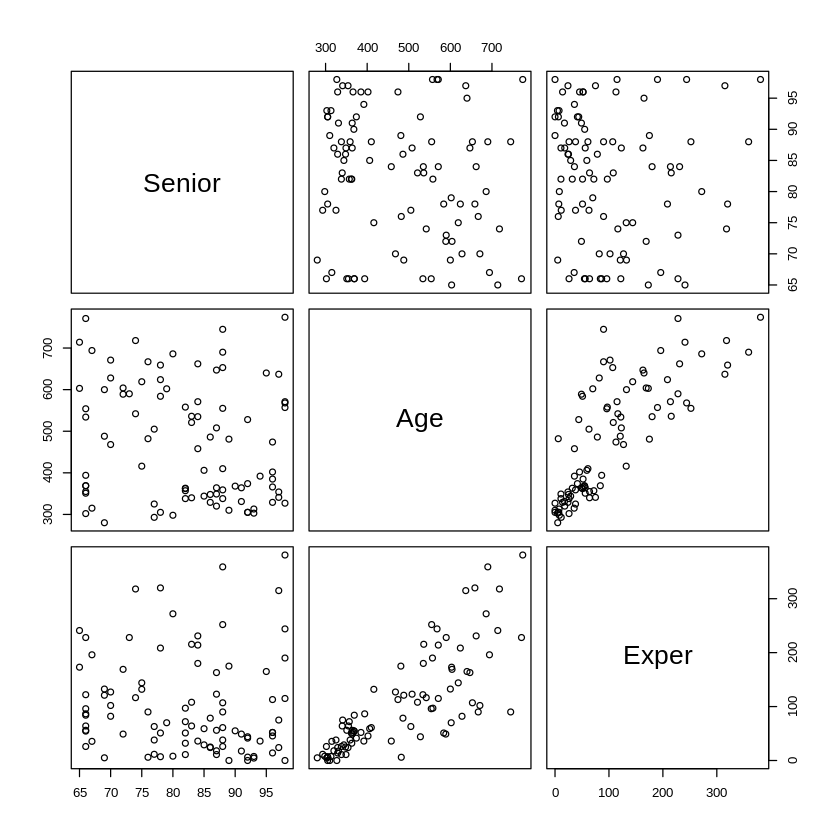

In [65]:
plot(filtro)

En esta gráfica redujimos los datos a las 3 variables que se mencionan en el ejercicio. Es la misma conclusión, entre Age y Eperience parece ser que hay una relación lineal